In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('datasetfull.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_code                      49999 non-null  float64
 1   Hospital_type_code                 49999 non-null  float64
 2   Hospital_region_code               49999 non-null  float64
 3   City_Code_Hospital                 49999 non-null  float64
 4   Available Extra Rooms in Hospital  49999 non-null  float64
 5   Department                         49999 non-null  float64
 6   Ward_Type                          49999 non-null  float64
 7   Ward_Facility_Code                 49999 non-null  float64
 8   Bed Grade                          49999 non-null  float64
 9   patientid                          49999 non-null  float64
 10  City_Code_Patient                  49999 non-null  float64
 11  Type of Admission                  49999 non-null  flo

In [4]:
df.shape

(49999, 17)

In [5]:
#切分训练集和测试集#
def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test .index = range(test.shape[0]) 
    return train,test

In [6]:
train, test = randSplit(df)

In [7]:
train.shape

(44999, 17)

In [8]:
test.shape

(5000, 17)

In [9]:
import numpy as np
def stayClass(train, test, k):
    train=pd.DataFrame(train,dtype=np.float)
    test=pd.DataFrame(test,dtype=np.float)
    n = train. shape[1]-1   #训练集的特征个数
    m = test. shape[0]     #测试集的样本数
    result = []                 #放置预测结果
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) **2).sum(1))**.5)    #距离计算
        dist_1 = pd.DataFrame({'dist':dist, 'labels':(train.iloc[:, n])})   #追加标签
        dr = dist_1.sort_values(by = 'dist')[: k]   #距离排序
        re = dr.loc[:, 'labels'].value_counts()     #统计
        result.append(re.index[0])    
    result = pd.Series(result)
    res = test.copy()
    res.loc[:, 'predict'] = result  #追加一列预测结果
    acc = (res.iloc[:,-1]==res.iloc[:,-2]).mean()    #计算预测的准确率
    print('accuracy{}'.format(acc))
    return acc, res

In [15]:
acc, df_stay = stayClass(train, test, 40)
df_stay.head()

accuracy0.3166


,Hospital_code,Hospital_type_code,Hospital_region_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,predict
0,0.161290,0.000,0.0,0.416667,0.125000,0.75,0.4,1.0,0.333333,0.036886,0.036886,1.0,0.333333,0.12500,0.47619,0.316601,0.285714,0.190476
1,0.806452,0.125,0.5,0.083333,0.125000,0.75,1.0,0.6,0.333333,0.036886,0.036886,0.0,0.333333,0.09375,0.47619,0.534190,0.285714,0.190476
2,0.225806,0.250,1.0,0.166667,0.083333,0.25,1.0,1.0,0.666667,0.036886,0.036886,1.0,0.333333,0.06250,0.47619,0.312945,0.380952,0.285714
3,0.838710,0.000,0.5,0.500000,0.166667,0.75,1.0,0.4,0.333333,0.036886,0.036886,0.0,0.333333,0.09375,0.47619,0.354447,0.285714,0.190476
4,0.967742,0.250,1.0,0.166667,0.083333,0.75,1.0,0.0,0.333333,0.448364,0.448364,1.0,0.333333,0.06250,0.47619,0.462451,0.190476,0.190476


accuracy0.3058
accuracy0.3116
accuracy0.3104
accuracy0.3088
accuracy0.3094
accuracy0.3062
accuracy0.3038
accuracy0.305
accuracy0.3048
accuracy0.3064
accuracy0.3066
accuracy0.3058
accuracy0.3078
accuracy0.3086
accuracy0.3106
accuracy0.3104
accuracy0.3102
accuracy0.311
accuracy0.3144
accuracy0.3166
accuracy0.3124
accuracy0.3108
accuracy0.3116
accuracy0.3122
40
0.3166


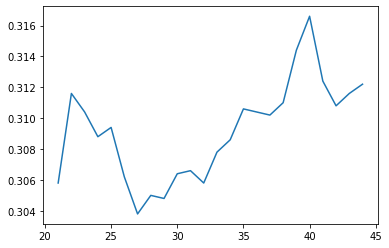

In [18]:
import matplotlib.pyplot as plt
#绘制学习曲线
score = []
krange = range(21,45)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))

accuracy0.2426
accuracy0.2528
accuracy0.2608
accuracy0.269
accuracy0.27
accuracy0.277
accuracy0.275
accuracy0.2814
accuracy0.286
accuracy0.2894
accuracy0.2908
accuracy0.2908
accuracy0.2912
accuracy0.295
accuracy0.2988
accuracy0.3036
accuracy0.2982
accuracy0.3022
accuracy0.3074
accuracy0.312
accuracy0.3058
accuracy0.3116
accuracy0.3104
accuracy0.3088
accuracy0.3094
accuracy0.3062
accuracy0.3038
accuracy0.305
accuracy0.3048
accuracy0.3064
accuracy0.3066
accuracy0.3058
accuracy0.3078
accuracy0.3086
accuracy0.3106
accuracy0.3104
accuracy0.3102
accuracy0.311
accuracy0.3144
accuracy0.3166
accuracy0.3124
accuracy0.3108
accuracy0.3116
accuracy0.3122
40
0.3166


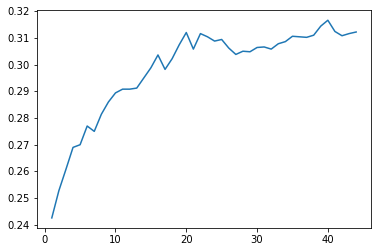

In [10]:
import matplotlib.pyplot as plt
#绘制学习曲线
score = []
krange = range(1,45)

for i in krange:
    acc,re = stayClass(train,test,i)
    score.append(acc)
plt.plot(krange,score);
bestK = krange[score.index(max(score))]
print(bestK)
print(max(score))